# Object detection with TensorFlow

## About this notebook

This notebook contains a simple implementation of a Deep Learning model for **object detection**.

The model presented in this repository has been totally implemented using open source tools (i.e., Python and TensorFlow).


## Imports

In [2]:
# General imports
import numpy as np ; np.random.seed(1) # for reproducibility
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import shutil
from datetime import datetime
from sklearn.model_selection import train_test_split
import joblib
pd.options.mode.chained_assignment = None
%matplotlib inline

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D 

# Tkinter
from tkinter import *
import PIL
from PIL import Image, ImageDraw, ImageFilter

## TensorFlow information

In [3]:
# Indicate the version of Tensorflow and whether it uses the CPU or the GPU
print("TensorFlow version:", tf.__version__)

if len(tf.config.list_physical_devices('GPU')) > 0:
    print("The GPU will be used for calculations.")
    
else:
    print("The CPU will be used for calculations.")

TensorFlow version: 2.4.0
The GPU will be used for calculations.


## 1. Import data 

In [4]:
# Import images and labels from the MNIST database
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

## 2. Describe data

In [5]:
# Describe data dimensions
print('Training images dimensions:', train_X.shape)
print('Training labels size:', train_y.shape[0])
print('Test images dimensions:', test_X.shape)
print('Test labels size:', test_y.shape[0])

Training images dimensions: (60000, 28, 28)
Training labels size: 60000
Test images dimensions: (10000, 28, 28)
Test labels size: 10000


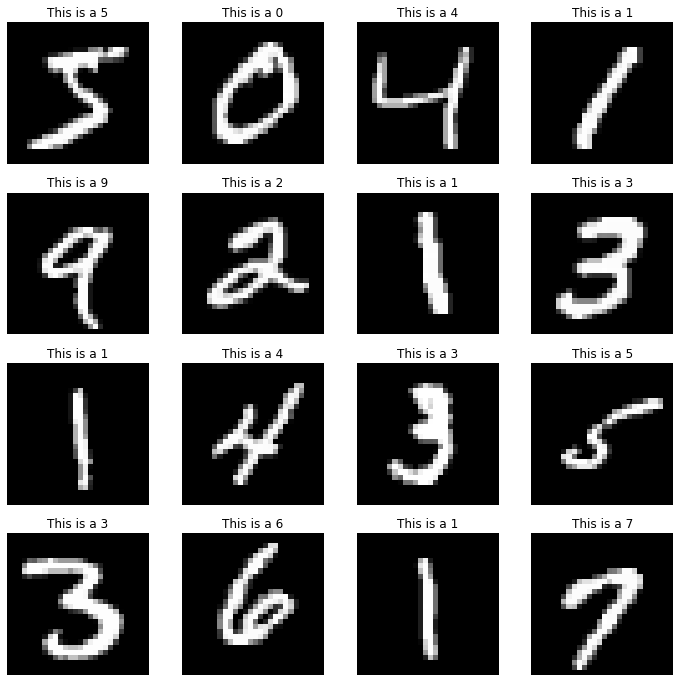

In [6]:
# Number of pictures in the grid
nrows = 4
ncols = 4

# Set up matplotlib fig
longitude_image = 3 # Inches per picture
fig = plt.gcf()
fig.set_size_inches(ncols * longitude_image, nrows * longitude_image)

# Plot some examples
for i in range(nrows*ncols):  
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.title('This is a ' + str(train_y[i]))

# Plot grid
plt.show()

## 3. Data Preprocessing

### Shuffle data

In [7]:
# Shuffle train data
permut = np.random.permutation(train_X.shape[0])
train_X = train_X[permut]
train_y = train_y[permut]

# Shuffle test data
permut = np.random.permutation(test_X.shape[0])
test_X = test_X[permut]
test_y = test_y[permut]

### Reshape

In [8]:
# Reshape images to include the channels
train_X = train_X.reshape(train_X.shape + (1,))
test_X = test_X.reshape(test_X.shape + (1,))

# Describe data dimensions
print('Training images dimensions:', train_X.shape)
print('Test images dimensions:', test_X.shape)

Training images dimensions: (60000, 28, 28, 1)
Test images dimensions: (10000, 28, 28, 1)


### Normalize

In [9]:
# Normalize
train_X = train_X / 255.
test_X = test_X / 255.              

### Convert labels to One-hot

In [10]:
# Converte Labels to one hot encoded format
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

### Create validation set

In [11]:
# Create validation set
X_train, X_val, y_train, y_val = train_test_split(train_X, 
                                                  train_y_one_hot, 
                                                  test_size=0.05, 
                                                  random_state=1)

In [12]:
# Describe data dimensions
print('Training images dimensions:', X_train.shape)
print('Training labels size:', y_train.shape[0])
print('Validation images dimensions:', X_val.shape)
print('Validation labels size:', y_val.shape[0])
print('Test images dimensions:', test_X.shape)
print('Test labels size:', test_y.shape[0])

Training images dimensions: (57000, 28, 28, 1)
Training labels size: 57000
Validation images dimensions: (3000, 28, 28, 1)
Validation labels size: 3000
Test images dimensions: (10000, 28, 28, 1)
Test labels size: 10000


## 4. Convolutional NN


In [1]:
# Decide whether you want to retrain the model or not
retrain = False # True

if retrain:
    print('The model will be retrained.')
else:
    print('The last saved model saved will be used.')

The last model saved will be used.


### Model

In [13]:
if retrain:
    
    # Create LeNet-5 architecture
    lenet_5_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Print summary
    lenet_5_model.summary()

### Compile

In [14]:
if retrain:

    # Compile model
    lenet_5_model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

## 5. Train

In [15]:
if retrain:

    # Set seed for random functions
    tf.random.set_seed(1)

    # Fit the model
    history = lenet_5_model.fit(
        x=X_train,
        y=y_train,
        batch_size=32,
        epochs=30,
        verbose=2,
        validation_data=(X_val, y_val)
    )

In [16]:
if retrain:

    # Save model
    lenet_5_model.save_weights('./model/wieghts_lenet_5.h5')
    lenet_5_model.save('./model/digit_recognizer_lenet_5.h5')
    

In [17]:
# Load model
lenet_5_model = keras.models.load_model('./model/digit_recognizer_lenet_5.h5')


## 6. Evaluating Accuracy and Loss for the Model

In [18]:
if retrain:
    
    # Get metrics on training and test data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Save history objects
    joblib.dump(acc, './model/acc_lenet_5.h5')
    joblib.dump(val_acc, './model/val_acc_lenet_5.h5')
    joblib.dump(loss, './model/loss_lenet_5.h5')
    joblib.dump(val_loss, './model/val_loss_lenet_5.h5')
    

In [19]:
# Load history objects
acc = joblib.load('./model/acc_lenet_5.h5')
val_acc = joblib.load('./model/val_acc_lenet_5.h5')
loss = joblib.load('./model/loss_lenet_5.h5')
val_loss = joblib.load('./model/val_loss_lenet_5.h5')


Text(0.5, 0, 'Epochs')

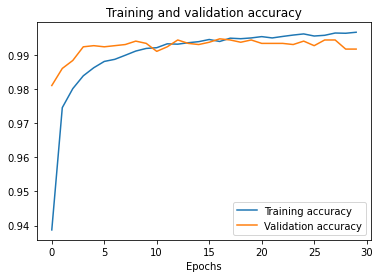

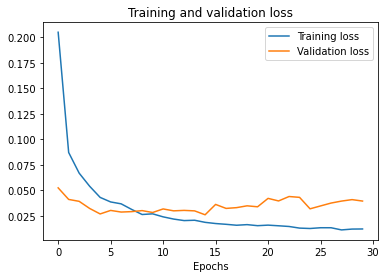

In [20]:
# Get number of epochs
epochs = range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend(loc=0)
plt.title('Training and validation loss')
plt.xlabel('Epochs')


## 7. Test images

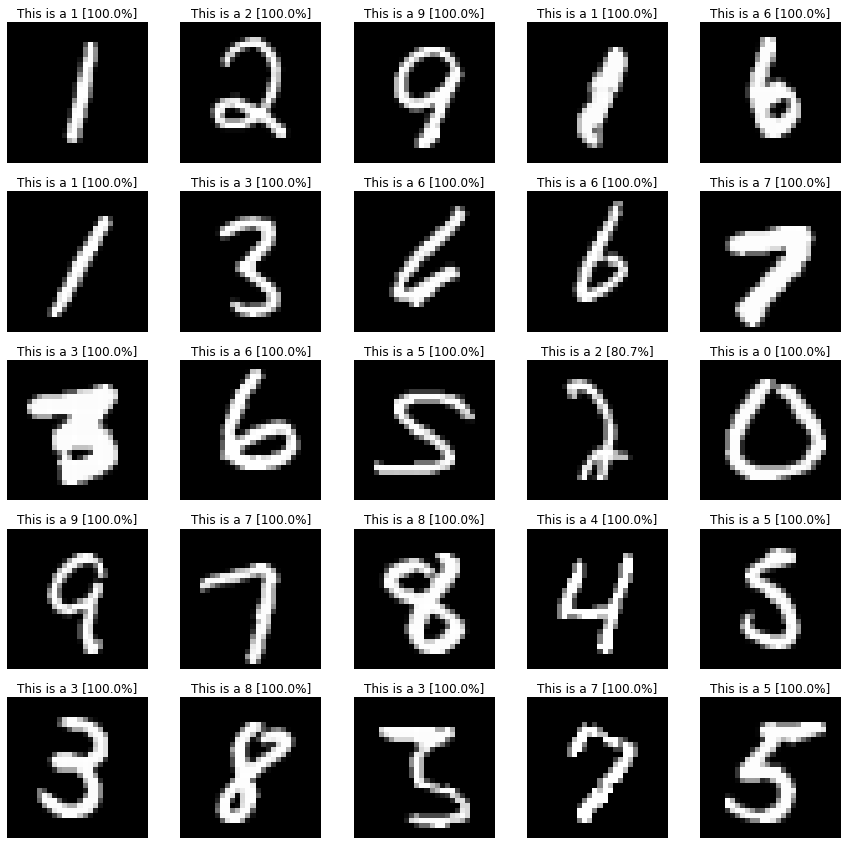

In [21]:
# Number of pictures in the grid
nrows = 5
ncols = 5

# Set up matplotlib fig
longitude_image = 3 # Inches per picture
fig = plt.gcf()
fig.set_size_inches(ncols * longitude_image, nrows * longitude_image)

# Plot some examples
for i in range(nrows*ncols):
    # Pre-process image
    x = test_X[i].reshape((1,) + test_X[i].shape)
    # Predict
    classes = lenet_5_model.predict(x)
    certainty = str(np.max(classes*100).round(1)) + '%'
    prediction = np.argmax(classes, axis=1)
    # Plot image
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    plt.title('This is a ' + str(prediction[0]) + ' [' + certainty + ']')

# Plot grid
plt.show()


## 8. Use case

In [27]:
# Create canvas to draw digits
use_case_path = './data/use_case/'

def save():
    global i
    image_name = 'image_' + str(i) + '.png'   
    new_image.save(use_case_path + image_name)
    i += 1
    clear()
    
def clear():
    global new_image, draw
    cv.delete("all")
    new_image = PIL.Image.new('RGB', (560, 560), 'black')
    draw = ImageDraw.Draw(new_image)

def activate_paint(e):
    global lastx, lasty
    cv.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y

def paint(e):
    global lastx, lasty
    x, y = e.x, e.y
    cv.create_line((lastx, lasty, x, y), fill='white', width=60, capstyle=ROUND, smooth=True)
    draw.line((lastx, lasty, x, y), fill='white', width=60)
    lastx, lasty = x, y

# Initialize variables
root = Tk()
lastx, lasty = None, None
i = 0

# Create canvas
cv = Canvas(root, width=560, height=560, bg='black')
cv.bind('<1>', activate_paint)
cv.pack(expand=YES, fill=BOTH)

# Create new image
new_image = PIL.Image.new('RGB', (560, 560), 'black')
draw = ImageDraw.Draw(new_image)

# Add buttons
btn_save = Button(text="Save", command=save, fg="green")
btn_save.pack()
btn_clear = Button(text="Clear", command=clear)
btn_clear.pack()

# Add title
root.title("Digit recognition")

# Remove previous images stored
filelist = [f for f in os.listdir(use_case_path) if f.endswith(".png") ]
for f in filelist:
    os.remove(os.path.join(use_case_path, f))

# Run
root.mainloop()

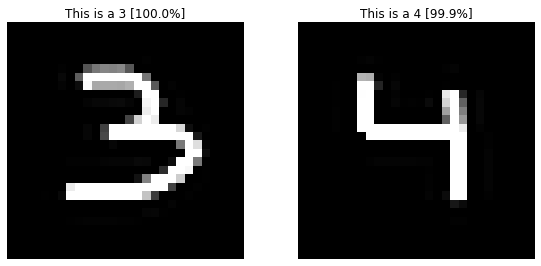

In [28]:
def imageprepare(path_to_image):
    
    """"
    Function to preprocess a raw image and transform it to MNIST style
    """
    
    # Load image and get dimensions
    img = Image.open(path_to_image).convert('L')
    width = float(img.size[0])
    height = float(img.size[1])
    
    # Create new image
    newImage = Image.new('L', (28, 28), 'black')
    nwidth = int(round((20.0 / height * width), 0))  
    img = img.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
    wleft = int(round(((28 - nwidth) / 2), 0)) 
    newImage.paste(img, (wleft, 4))  
#     type(newImage.getdata())
    
    # Process image
    img_array = np.array(newImage.getdata()) 
    img_array = tf.reshape(img_array, [28, 28, 1])

    return img_array

# Get names of pictures
use_case_names = os.listdir(use_case_path)

# Number of pictures in the grid
nrows = 4
ncols = 4

# Set up matplotlib fig
longitude_image = 5 # Inches per picture
fig = plt.gcf()
fig.set_size_inches(ncols * longitude_image, nrows * longitude_image)

# Get names of pictures
use_case_names = os.listdir(use_case_path)

# Get path to each image
use_case_pix = [os.path.join(use_case_path, fname) for fname in use_case_names[:nrows*ncols]]

# Plot some examples
for i, img_path in enumerate(use_case_pix):
    # Load image
#     img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), grayscale=True)
    img = imageprepare(img_path)
    # Pre-process image
    input_img = keras.preprocessing.image.img_to_array(img)
    input_img = input_img / 255.
    input_img = input_img.reshape((1,) + input_img.shape)
    # Predict
    classes = lenet_5_model.predict(input_img)
    certainty = str(np.max(classes*100).round(1)) + '%'
    prediction = np.argmax(classes, axis=1)
    # Plot image
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
#     img = mpimg.imread(img_path)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.title('This is a ' + str(prediction[0]) + ' [' + certainty + ']')

# Plot grid
plt.show()

In [29]:
# Print time when finished
now = datetime.now()
print("Finished at", now.strftime("%Y-%m-%d %H:%M:%S"))

Finished at 2021-01-22 19:51:29
